# Praktikum 2

# Langkah 1 - Ilustrasi Data Non-Linier
Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 1c - Buat Data Dummy Non-Linier

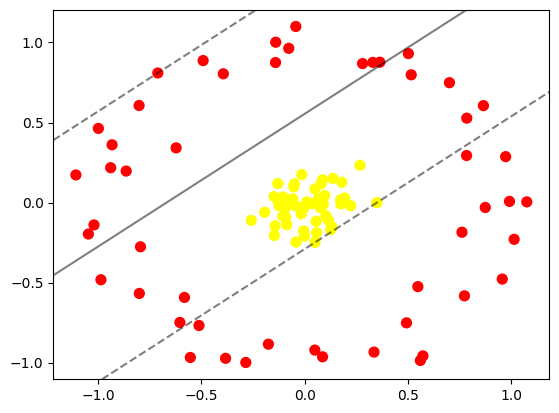

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

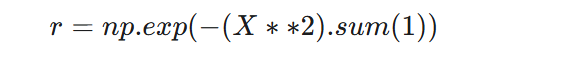

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.15350310e-01,  7.98089141e-01],
       [-9.69895578e-02, -3.85692043e-02],
       [ 5.59726851e-01, -9.86336910e-01],
       [ 1.79525283e-01,  1.26946383e-01],
       [ 5.50986193e-02, -1.17005840e-01],
       [ 3.64590190e-02, -5.95860372e-03],
       [-5.01285933e-02,  1.16238316e-01],
       [ 4.88805186e-02, -9.21599126e-01],
       [ 7.83330811e-01,  2.93958264e-01],
       [ 2.79826174e-01,  8.68399822e-01],
       [-1.75958771e-01, -8.84614429e-01],
       [ 1.07494396e+00,  4.24054356e-03],
       [-6.04406532e-01, -7.48889779e-01],
       [-5.82909692e-02,  2.34629814e-02],
       [ 1.02419109e-01, -8.40343457e-02],
       [ 7.87862304e-02,  1.16223883e-01],
       [ 1.73801181e-01,  1.65131407e-02],
       [-1.29271027e-01,  1.08458420e-02],
       [-8.00798032e-01, -5.67552076e-01],
       [-4.24391315e-02, -2.46528793e-01],
       [-4.32427008e-02,  1.10001734e+00],
       [ 5.47626695e-01, -5.25044902e-01],
       [ 1.75637504e-01, -8.35112587e-03],
       [-1.47680629e-01, -2.05689573e-01],
       [-8.64398256e-01,  1.96758309e-01],
       [-9.39314354e-01,  2.17651149e-01],
       [-7.11257929e-01,  8.09453165e-01],
       [ 1.36298691e-01,  1.50946433e-01],
       [ 5.01711194e-01,  9.30667995e-01],
       [-1.02021427e+00, -1.39739428e-01],
       [ 9.72509021e-01,  2.86798717e-01],
       [ 3.29861469e-01,  8.75828397e-01],
       [ 1.25582429e-01, -1.69749374e-01],
       [ 8.62044898e-02, -9.63483632e-01],
       [ 3.63383647e-01,  8.76894762e-01],
       [-9.99000219e-01,  4.63251685e-01],
       [-1.06529326e-01, -8.47544209e-02],
       [ 9.56163797e-01, -4.77771218e-01],
       [ 8.64954208e-01,  6.05552706e-01],
       [ 5.72039605e-01, -9.57704515e-01],
       [-2.58922893e-01, -1.11683103e-01],
       [-5.53785517e-01, -9.67744275e-01],
       [-6.22654042e-01,  3.41685072e-01],
       [ 4.98653812e-02, -2.48638019e-01],
       [ 2.22228099e-01, -1.93332796e-02],
       [ 1.93644105e-01,  2.87275252e-02],
       [ 7.84363814e-01,  5.27367851e-01],
       [ 3.49001365e-01, -6.66427987e-04],
       [-1.24564167e-01, -1.92329301e-02],
       [ 1.14925237e-01, -1.10333627e-01],
       [-5.29928179e-03, -1.76847243e-01],
       [ 9.21302723e-03,  3.47265647e-03],
       [-1.41450835e-01,  8.74852308e-01],
       [ 3.35357024e-01, -9.34081931e-01],
       [-1.04836572e-01,  3.49822428e-02],
       [-1.70358724e-02, -7.03479407e-02],
       [-5.82275077e-01, -5.92604591e-01],
       [-3.83269930e-01, -9.72945207e-01],
       [-5.33460298e-02,  9.91512400e-02],
       [ 6.69898739e-02,  2.32113842e-02],
       [-7.89511209e-02, -6.74214898e-04],
       [ 4.92552086e-01, -7.51341885e-01],
       [-1.48661468e-01,  3.77011392e-02],
       [-2.85339249e-01, -9.98956122e-01],
       [-1.43557380e-01, -1.45544003e-01],
       [-4.91964245e-01,  8.87143600e-01],
       [ 8.60875429e-02,  1.42273820e-01],
       [-1.04741062e+00, -1.96539864e-01],
       [-1.42616219e-02,  1.74796408e-01],
       [-4.85234550e-02, -1.88403032e-02],
       [-1.94012102e-01, -6.12669709e-02],
       [-9.32614248e-01,  3.60876601e-01],
       [ 2.67460209e-01,  2.33151828e-01],
       [-1.10821885e-03, -2.09569252e-01],
       [-8.67829271e-02, -1.38237992e-01],
       [-7.73659048e-02,  9.63576351e-01],
       [-1.28869723e-02, -2.91397567e-02],
       [-5.68352455e-03, -3.44817556e-02],
       [ 8.73845723e-01, -3.05718705e-02],
       [ 1.31501770e-01, -1.51185760e-01],
       [-9.86574452e-01, -4.82031981e-01],
       [ 9.01626377e-02, -1.00631303e-02],
       [-1.40418805e-01,  1.00187023e+00],
       [-8.02040059e-01,  6.06427396e-01],
       [ 7.73112305e-01, -5.82739322e-01],
       [-7.95146164e-01, -2.76207316e-01],
       [ 5.74010949e-02, -1.88820256e-01],
       [-3.94273076e-01,  8.04428693e-01],
       [ 9.66256145e-02,  4.35479600e-02],
       [ 9.91146776e-01,  7.31085358e-03],
       [-9.18408286e-02, -9.25529764e-02],
       [ 7.61124790e-01, -1.85310710e-01

# Langkah 2 - Fitting Model
Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

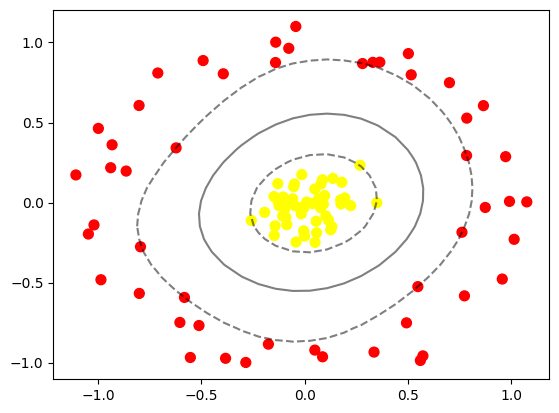

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')